In [ ]:
import pandas as pd

#Data Loading

In [ ]:
dataset = pd.read_csv("/content/sample_data/Electric_Vehicle_Population_Data.csv")
dataset.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


#Data Pre-processing

In [ ]:
print(dataset['State'].unique())

['WA' 'OR' 'NY' 'DC' 'CA' 'TX' 'FL' 'OK' 'MO' 'KS' 'VA' 'MA' 'NC' 'IL'
 'AL' 'WY' 'CO' 'PA' 'WI' 'MD' 'NV' 'AZ' 'GA' 'NJ' 'CT' 'NE' 'NH' 'ID'
 'HI' 'KY' 'OH' 'NM' 'TN' 'SC' 'AK' 'RI' 'UT' 'AE' 'DE' 'IN' 'ME' 'AR'
 'MI' 'MN' 'BC' 'AP' 'LA' 'NS' 'MS']


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232230 entries, 0 to 232229
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         232230 non-null  object 
 1   County                                             232226 non-null  object 
 2   City                                               232226 non-null  object 
 3   State                                              232230 non-null  object 
 4   Postal Code                                        232226 non-null  float64
 5   Model Year                                         232230 non-null  int64  
 6   Make                                               232230 non-null  object 
 7   Model                                              232230 non-null  object 
 8   Electric Vehicle Type                              232230 non-null  object

In [ ]:
dataset.isnull().sum()

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
dataset['Electric Vehicle Type'] = dataset['Electric Vehicle Type'].replace({
    'Battery Electric Vehicle (BEV)': 'BEV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'PHEV'
})

In [ ]:
dataset['Electric Vehicle Type'].value_counts()

,count
Electric Vehicle Type,
BEV,184054
PHEV,48176


In [ ]:
# Replace long names with short names
dataset['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = dataset['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].replace({
    'Clean Alternative Fuel Vehicle Eligible': 'Yes',
    'Not eligible due to low battery range': 'No',
    'Eligibility unknown as battery range has not been researched': 'Unknown'
})

In [ ]:
dataset['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

,count
Clean Alternative Fuel Vehicle (CAFV) Eligibility,
Unknown,136865
Yes,72847
No,22518


In [ ]:
# Change column name of VIN (1-10) to VIN for easy use
dataset.rename(columns={'VIN (1-10)': 'VIN'}, inplace=True)
print(dataset.columns)

Index(['VIN', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make',
       'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [ ]:
dataset.head(20)

,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,BEV,Yes,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,BEV,Yes,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,PHEV,Yes,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,PHEV,Yes,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,BEV,Unknown,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
5,3C3CFFGE1G,Thurston,Olympia,WA,98501.0,2016,FIAT,500,BEV,Yes,84.0,0.0,22.0,294762219,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
6,5YJ3E1EA4J,Snohomish,Marysville,WA,98271.0,2018,TESLA,MODEL 3,BEV,Yes,215.0,0.0,39.0,270125096,POINT (-122.1677 48.11026),PUGET SOUND ENERGY INC,5.306105e+10
7,5YJ3E1EA3K,King,Seattle,WA,98102.0,2019,TESLA,MODEL 3,BEV,Yes,220.0,0.0,43.0,238776492,POINT (-122.32427 47.63433),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
8,1N4AZ0CP5E,Thurston,Yelm,WA,98597.0,2014,NISSAN,LEAF,BEV,Yes,84.0,0.0,2.0,257246118,POINT (-122.60735 46.94239),PUGET SOUND ENERGY INC,5.306701e+10
9,5YJSA1S25F,Thurston,Yelm,WA,98597.0,2015,TESLA,MODEL S,BEV,Yes,208.0,0.0,2.0,161974606,POINT (-122.60735 46.94239),PUGET SOUND ENERGY INC,5.306701e+10


In [ ]:
#splitting Vehicle Location to longitude and latitude
def extract_lon(x):
    if isinstance(x, str) and x.startswith('POINT'):
        parts = x.replace('POINT (', '').replace(')', '').split(' ')
        return float(parts[0])
    else:
        return None
def extract_lat(x):
    if isinstance(x, str) and x.startswith('POINT'):
        parts = x.replace('POINT (', '').replace(')', '').split(' ')
        return float(parts[1])
    else:
        return None


dataset['longitude'] = dataset['Vehicle Location'].apply(extract_lon)
dataset['latitude'] = dataset['Vehicle Location'].apply(extract_lat)

In [ ]:
#after splitting the Vehicle Location column removing it
dataset = dataset.drop('Vehicle Location', axis=1)

In [ ]:
dataset.head(10)

,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,longitude,latitude
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,BEV,Yes,103.0,0.0,41.0,186450183,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,-122.16210,47.64441
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,BEV,Yes,220.0,0.0,1.0,478093654,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,-122.20563,47.76144
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,PHEV,Yes,40.0,0.0,35.0,274800718,PUGET SOUND ENERGY INC,5.306701e+10,-122.92333,47.03779
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,PHEV,Yes,42.0,0.0,2.0,260758165,PUGET SOUND ENERGY INC,5.306701e+10,-122.81754,46.98876
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,BEV,Unknown,0.0,0.0,15.0,236581355,PACIFICORP,5.307700e+10,-120.53145,46.65405
5,3C3CFFGE1G,Thurston,Olympia,WA,98501.0,2016,FIAT,500,BEV,Yes,84.0,0.0,22.0,294762219,PUGET SOUND ENERGY INC,5.306701e+10,-122.89166,47.03956
6,5YJ3E1EA4J,Snohomish,Marysville,WA,98271.0,2018,TESLA,MODEL 3,BEV,Yes,215.0,0.0,39.0,270125096,PUGET SOUND ENERGY INC,5.306105e+10,-122.16770,48.11026
7,5YJ3E1EA3K,King,Seattle,WA,98102.0,2019,TESLA,MODEL 3,BEV,Yes,220.0,0.0,43.0,238776492,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,-122.32427,47.63433
8,1N4AZ0CP5E,Thurston,Yelm,WA,98597.0,2014,NISSAN,LEAF,BEV,Yes,84.0,0.0,2.0,257246118,PUGET SOUND ENERGY INC,5.306701e+10,-122.60735,46.94239
9,5YJSA1S25F,Thurston,Yelm,WA,98597.0,2015,TESLA,MODEL S,BEV,Yes,208.0,0.0,2.0,161974606,PUGET SOUND ENERGY INC,5.306701e+10,-122.60735,46.94239


In [ ]:
dataset.shape

(232230, 18)

In [ ]:
dataset.drop_duplicates()
#removing duplicate values

,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,longitude,latitude
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,BEV,Yes,103.0,0.0,41.0,186450183,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,-122.16210,47.64441
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,BEV,Yes,220.0,0.0,1.0,478093654,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,-122.20563,47.76144
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,PHEV,Yes,40.0,0.0,35.0,274800718,PUGET SOUND ENERGY INC,5.306701e+10,-122.92333,47.03779
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,PHEV,Yes,42.0,0.0,2.0,260758165,PUGET SOUND ENERGY INC,5.306701e+10,-122.81754,46.98876
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,BEV,Unknown,0.0,0.0,15.0,236581355,PACIFICORP,5.307700e+10,-120.53145,46.65405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232225,5YJ3E1EA3K,King,Renton,WA,98058.0,2019,TESLA,MODEL 3,BEV,Yes,220.0,0.0,47.0,262629839,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,-122.08747,47.44660
232226,1GKB0RDC1R,Snohomish,Snohomish,WA,98290.0,2024,GMC,HUMMER EV SUV,BEV,Unknown,0.0,0.0,39.0,261119043,PUGET SOUND ENERGY INC,5.306105e+10,-122.09305,47.91265
232227,7SAYGDED3R,King,Redmond,WA,98033.0,2024,TESLA,MODEL Y,BEV,Unknown,0.0,0.0,45.0,261726258,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,-122.20660,47.67887
232228,JTMEB3FV5P,Chelan,Leavenworth,WA,98826.0,2023,TOYOTA,RAV4 PRIME,PHEV,Yes,42.0,0.0,12.0,236639826,PUD NO 1 OF CHELAN COUNTY,5.300796e+10,-120.65754,47.59820


In [ ]:
#droping missing values
dataset.dropna(inplace=True)

In [ ]:
dataset.shape

(231715, 18)

In [ ]:
#save the cleaned dataset
dataset.to_csv('ev_cleaned_data.csv', index=False)

In [ ]:
dataset.isnull().sum()

,0
VIN,0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
import altair as alt
alt.data_transformers.enable('vegafusion')

DataTransformerRegistry.enable('vegafusion')

In [ ]:
!pip install altair vegafusion vegafusion-python-embed
!pip install "vl-convert-python>=1.6.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 10.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
dataset = pd.read_csv("/content/ev_cleaned_data.csv")

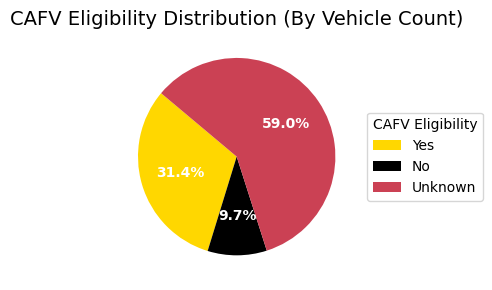

In [ ]:
import numpy as np  # Import numpy since it was missing

df=dataset
# Count number of rows for each CAFV eligibility category
eligibility_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().reindex(['Yes', 'No', 'Unknown'])

# Plot pie chart using actual row counts
colors = ['#FFD700', '#000000', '#CB4154']  # Gold, Black, Light Brick
fig, ax = plt.subplots(figsize=(4, 4))
wedges, texts, autotexts = ax.pie(
    eligibility_counts,
    labels=eligibility_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'color': "white", 'weight': 'bold'}
)
ax.legend(wedges, eligibility_counts.index,
          title="CAFV Eligibility",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10)

plt.title('CAFV Eligibility Distribution (By Vehicle Count)', fontsize=14)
# plt.legend()
plt.tight_layout()
plt.show()


#QUESTION - 1 How has the adoption of electric vehicles (EVs) changed over time in Washington State between battery electric vehicles (BEVs) and plug-in hybrid electric vehicles (PHEVs) and are there any years with notable spike or improvement in EV adoption.


## **Time-Series Analysis**

# Basic

In [ ]:

df_yearly = dataset.groupby('Model Year').size().reset_index(name='Count')

chart1 = alt.Chart(df_yearly).mark_line(point=True).encode(
    x=alt.X('Model Year:O', title='Model Year'),
    y=alt.Y('Count:Q', title='Number of EVs'),
    tooltip=['Model Year', 'Count']
).properties(
    title='EV Adoption Over Time in Washington State'
)
chart1

alt.Chart(...)

In [ ]:
# First, ensure EV types are labeled as 'BEV' and 'PHEV'
dataset['Electric Vehicle Type'] = dataset['Electric Vehicle Type'].replace({
    'Battery Electric Vehicle (BEV)': 'BEV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'PHEV'
})

df_type_year = dataset.groupby(['Model Year', 'Electric Vehicle Type']).size().reset_index(name='Count')

chart2 = alt.Chart(df_type_year).mark_bar().encode(
    x=alt.X('Model Year:O', title='Model Year'),
    y=alt.Y('Count:Q', title='Number of Vehicles'),
    color='Electric Vehicle Type:N',
    tooltip=['Model Year', 'Electric Vehicle Type', 'Count']
).properties(
    title='BEV vs PHEV Adoption Over Time'
)
chart2

alt.Chart(...)

# Area Chart + Make

In [ ]:
import pandas as pd
import plotly.express as px
df=dataset
# Rename column
df = df.rename(columns={'Model Year': 'Model_Year'})

# Get top 10 makes
top_makes = df['Make'].value_counts().nlargest(10).index
df_top = df[df['Make'].isin(top_makes)]

# Group by year and make
grouped = (
    df_top.groupby(['Model_Year', 'Make'])
    .size()
    .reset_index(name='vehicle_count')
)

# Create area chart
fig = px.area(
    grouped,
    x='Model_Year',
    y='vehicle_count',
    color='Make',
    labels={'vehicle_count': 'Number of Vehicles', 'Model_Year': 'Model Year'},
    title='EV Adoption by Top 10 Makes Over Time (2010–2025)',
    range_x=[2010, 2025]
)

fig.update_layout(
    legend_title_text='Make',
    xaxis=dict(dtick=1),
    yaxis_title='Vehicle Count',
    template='plotly_white'
)

fig.show()


# Animated Bart Chart - Growth from 2010 - 2025

In [ ]:
import pandas as pd
import plotly.express as px

# Step 1: Rename the column
df = dataset.rename(columns={'Model Year': 'Model_Year'})

# Step 2: Get top 10 makes
top_makes = df['Make'].value_counts().nlargest(10).index
df_top = df[df['Make'].isin(top_makes)]

# Step 3: Group by Make and Year, sort by year
grouped = (
    df_top.groupby(['Make', 'Model_Year'])
    .size()
    .reset_index(name='yearly_count')
    .sort_values(['Make', 'Model_Year'])
)

# Step 4: Cumulative count by Make
grouped['cumulative_count'] = grouped.groupby('Make')['yearly_count'].cumsum()

# Step 5: Ensure full make-year combinations
all_years = sorted(df_top['Model_Year'].unique())
all_combinations = pd.MultiIndex.from_product([top_makes, all_years], names=['Make', 'Model_Year'])
full_df = pd.DataFrame(index=all_combinations).reset_index()

# Step 6: Merge and forward fill
merged = pd.merge(full_df, grouped[['Make', 'Model_Year', 'cumulative_count']], on=['Make', 'Model_Year'], how='left')
merged['cumulative_count'] = merged.groupby('Make')['cumulative_count'].ffill().fillna(0)

# Step 7: Ensure years are sorted and animation frame starts from 2010
merged['Model_Year'] = merged['Model_Year'].astype(int)
merged = merged[merged['Model_Year'] >= 2010]  # filter from 2010 onward
merged = merged.sort_values('Model_Year')
merged['Model_Year_str'] = merged['Model_Year'].astype(str)  #  animation_frame

# Step 8: Plot animation with correct frame ordering
fig = px.bar(
    merged,
    x='Make',
    y='cumulative_count',
    color='Make',
    animation_frame='Model_Year_str',
    labels={'cumulative_count': 'Cumulative Vehicle Count', 'Model_Year_str': 'Model Year'},
    title='Cumulative EV Adoption by Top 10 Makes (Starting from 2010)',
    range_y=[0, merged['cumulative_count'].max() * 1.1]
)

fig.update_layout(
    xaxis={'categoryorder': 'array', 'categoryarray': list(top_makes)},
    yaxis_title='Cumulative Vehicle Count',
    template='plotly_white'
)

fig.show()


# QUESTION 2 - How do Electric Vehicles distribute across counties in Washington State? Which counties are top adopters of BEVs and PHEVs and how growth has increased in those counties? Does growth vary in urban and rural zones?

## **GEOGRAPHIC ANALYSIS**

## EV by COUNTY - Heatmap

In [ ]:
!pip install mplcursors


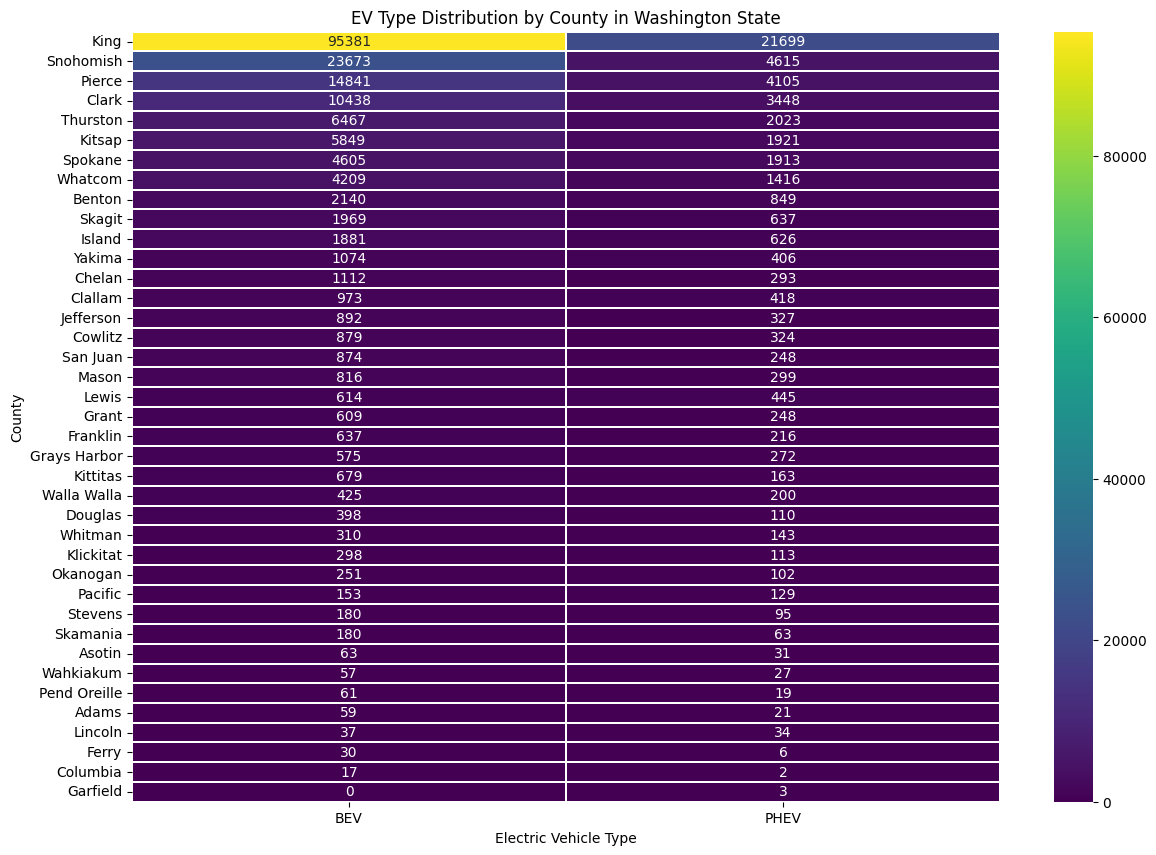

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by County and EV Type (BEV/PHEV)
county_ev_type_counts = df.groupby(['County', 'Electric Vehicle Type'])['VIN'].count().unstack(fill_value=0)

# Step 2: Sort counties by total EV count in descending order
county_ev_type_counts['Total EVs'] = county_ev_type_counts.sum(axis=1)  # Sum of BEV + PHEV
county_ev_type_counts = county_ev_type_counts.sort_values('Total EVs', ascending=False)

# Step 3: Drop the 'Total EVs' column as we no longer need it for the heatmap
county_ev_type_counts = county_ev_type_counts.drop(columns='Total EVs')

# Step 4: Plot the heatmap with the 'viridis' color map
plt.figure(figsize=(14, 10))
sns.heatmap(county_ev_type_counts, annot=True, fmt="d", cmap="viridis", linewidths=0.1)
plt.title("EV Type Distribution by County in Washington State")
plt.ylabel("County")
plt.xlabel("Electric Vehicle Type")
plt.show()

The Heatmap looks good. But since most counties have very less count they linger in the violet region and the color difference cant be seen. lets use numbers for visualizing that drilling down to top N counties

## Top 10 Counties by EV Population

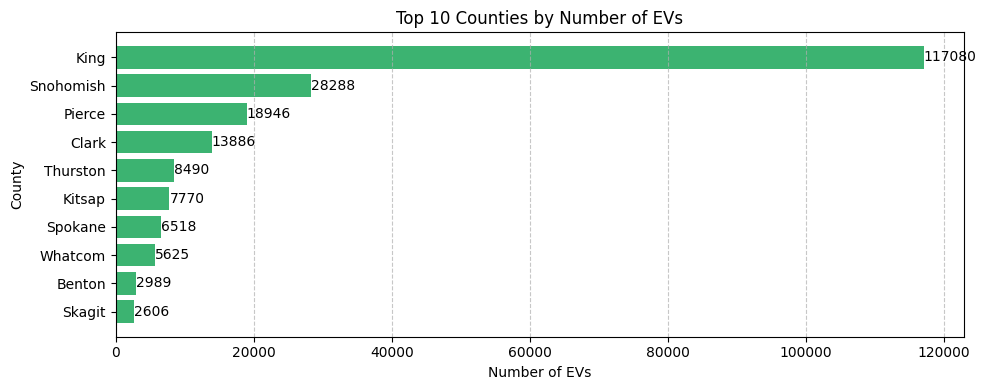

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import mplcursors

df = pd.read_csv("/content/ev_cleaned_data.csv")

# Count number of VINs per county
county_vin_counts = df.groupby('County')['VIN'].count().reset_index()

# Get top 10 counties
top_10 = county_vin_counts.sort_values(by='VIN', ascending=False).head(10)

# Sort for horizontal display (ascending order so largest at top)
top_10_sorted = top_10.sort_values(by='VIN', ascending=True)


## Plot
plt.figure(figsize=(10, 4))
bars = plt.barh(top_10_sorted['County'], top_10_sorted['VIN'], color='mediumseagreen')
plt.title('Top 10 Counties by Number of EVs')
plt.xlabel('Number of EVs')
plt.ylabel('County')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add count labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5,                # X position (slightly to the right of bar)
             bar.get_y() + bar.get_height() / 2,  # Y position (centered on bar)
             f'{int(width)}',          # Label text
             va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

Now we can clearly see the difference in bars and the counts are right beside. This might introduce unwanted and misleading skewness because the top KING county is way more than the others.

# QUESTION 3 - How do consumer preferences for electric vehicle makes and models vary across Washington state, and do these preferences differ between Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs)?


## **Categorical Analysis**

## Stacked Bar Chart - MAKE & MODEL

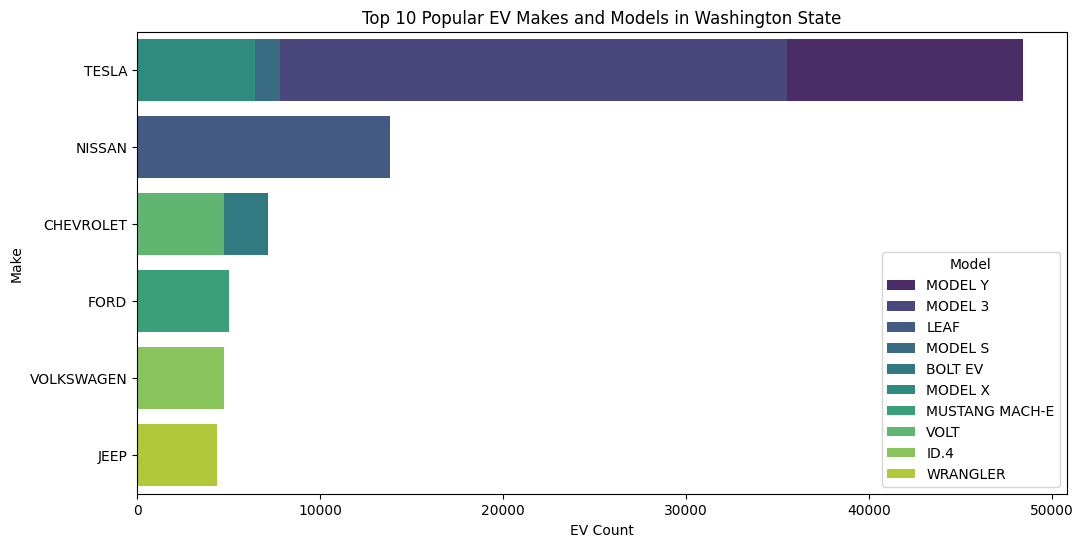

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset

df = pd.read_csv("/content/ev_cleaned_data.csv")

# Step 2: Preprocess the data
# Make sure 'Make', 'Model' and 'EV Type' are properly handled as categorical variables
df['Make'] = df['Make'].astype(str)
df['Model'] = df['Model'].astype(str)
df['Electric Vehicle Type'] = df['Electric Vehicle Type'].astype(str)
df['County'] = df['County'].astype(str)

# Step 3: Group by Make and Model, and aggregate the count
make_model_counts = df.groupby(['Make', 'Model'])['VIN'].count().reset_index()
make_model_counts.rename(columns={'VIN': 'Count'}, inplace=True)

# Step 4: Plot the most popular makes and models
top_10_ev = make_model_counts.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_ev, x='Count', y='Make', hue='Model', dodge=False, palette='viridis')
plt.title("Top 10 Popular EV Makes and Models in Washington State")
plt.xlabel("EV Count")
plt.ylabel("Make")
plt.show()

The stack bar chart uses VIRIDIS color palette which is perceptually uniform. Also shows the top Makes. To make it more interactive and insightful, lets further drlldown into itts models.

## CIRCLE PARKING

In [ ]:
import pandas as pd
import plotly.express as px

# Load dataset
bla = pd.read_csv('/content/sample_data/Electric_Vehicle_Population_Data.csv')
bla.rename(columns={'VIN (1-10)': 'VIN'}, inplace=True)

# Group
vehicle_counts = bla.groupby(['Electric Vehicle Type', 'Make', 'Model']).agg({'VIN': 'count'}).reset_index()
vehicle_counts.rename(columns={'VIN': 'Count'}, inplace=True)


# Total count for % calculation
total_count = vehicle_counts['Count'].sum()
vehicle_counts['Percentage'] = (vehicle_counts['Count'] / total_count * 100).round(2)

# Plot Circle Packing
fig = px.sunburst(
    vehicle_counts,
    path=['Make', 'Model'],
    values='Count',
    color='Make',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    hover_data={'Count': True, 'Percentage': True}
)

fig.update_traces(
    hovertemplate="<b>%{label}</b><br>Vehicle Count: %{customdata[0]}<br>% of Total: %{customdata[1]}%"
)

fig.update_layout(
    margin=dict(t=30, l=30, r=30, b=30),
    uniformtext=dict(minsize=10, mode='hide')
)

fig.show()


Circle parking chart is good but to make the zooming transition smoother, we can use a sunburst chart.

## SUNBURST   - MAKE & MODEL

In [ ]:
import pandas as pd
import plotly.express as px

# Step 1: Prepare grouped data
make_model_counts = dataset.groupby(['Make', 'Model']).agg({'DOL Vehicle ID': 'count'}).reset_index()
make_model_counts.rename(columns={'DOL Vehicle ID': 'Count'}, inplace=True)

# Step 2: Build sunburst
fig = px.sunburst(
    make_model_counts,
    path=['Make', 'Model'],
    values='Count',
    color='Make',
    color_discrete_sequence=px.colors.qualitative.Safe,
    title='Vehicle Distribution by Make and Model',
    width=800,
    height=800,
)

# Step 3: Customize the hovertemplate
fig.update_traces(
    hovertemplate=(
        "<b>%{label}</b><br>" +
        "<b>Count:</b> %{value}<br>" +
        "<b>% of Parent:</b> %{percentParent:.2%}" +
        "<extra></extra>"
    )
)

# Step 4: Show
fig.show()


Zooming transition is smooth now but to make it better, we introduce top N makes which is less cluttered and similar to this shows the percentage of the parent node.

## SUNBURST CHART - Top N

In [ ]:
import pandas as pd
import plotly.express as px

# Step 1: Identify Top 10 Makes first before grouping models
top_makes = dataset['Make'].value_counts().nlargest(5).index

# Step 2: Filter dataset to only Top 10 Makes
filtered_dataset = dataset[dataset['Make'].isin(top_makes)]

# Step 3: Group by Make and Model
make_model_counts = filtered_dataset.groupby(['Make', 'Model']).agg({'DOL Vehicle ID': 'count'}).reset_index()
make_model_counts.rename(columns={'DOL Vehicle ID': 'Count'}, inplace=True)

# Step 4: Build sunburst
fig = px.sunburst(
    make_model_counts,
    path=['Make', 'Model'],
    values='Count',
    color='Make',
    color_discrete_sequence=px.colors.sequential.Viridis,
    title='Top Makes Vehicle Distribution by Model',
    width=800,
    height=800,
)

# Step 5: Customize the hovertemplate
fig.update_traces(
    hovertemplate=(
        "<b>%{label}</b><br>" +
        "<b>Count:</b> %{value}<br>" +
        "<b>% of Parent:</b> %{percentParent:.2%}" +
        "<extra></extra>"
    )
)

# Step 6: Show
fig.show()


We have a better sunburst now. But it lacks distribution between BEV and PHEV. We can fit that using an icecle chart below.

## ICICLE CHART

In [ ]:
import pandas as pd
import plotly.express as px

# Load dataset
bla = pd.read_csv('/content/sample_data/ev_cleaned_data.csv')

# Rename column
bla.rename(columns={'VIN (1-10)': 'VIN'}, inplace=True)

# Group the data
vehicle_counts = bla.groupby(['Electric Vehicle Type', 'Make', 'Model']).agg({'VIN': 'count'}).reset_index()
vehicle_counts.rename(columns={'VIN': 'Count'}, inplace=True)

# Create Icicle chart
fig = px.icicle(
    vehicle_counts,
    path=['Electric Vehicle Type', 'Make', 'Model'],   # Hierarchy
    values='Count',
    color='Make',
    # uniformtext=dict(minsize=10, mode='show'),
# Color by MAKE
    color_discrete_sequence=px.colors.sequential.Viridis,
    labels={'Count': 'Vehicle Count'},
    title='EV Distribution by Make and Model'
)

# Dark background
fig.update_layout(
    template='plotly_dark',
    margin=dict(t=30, l=10, r=10, b=10),
    plot_bgcolor='rgb(20, 20, 20)'
)

fig.show()


Better Now that we are able to see EV Types as well. But a flow is missing. That can be acheived by a Sankey.

## SANKEY DIAGRAM


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load dataset
bla = pd.read_csv('/content/sample_data/Electric_Vehicle_Population_Data.csv')
bla.rename(columns={'VIN (1-10)': 'VIN'}, inplace=True)

# Group
vehicle_counts = bla.groupby(['Electric Vehicle Type', 'Make', 'Model']).agg({'VIN': 'count'}).reset_index()
vehicle_counts.rename(columns={'VIN': 'Count'}, inplace=True)

# Create nodes
all_labels = pd.unique(vehicle_counts['Electric Vehicle Type'].tolist() +
                       vehicle_counts['Make'].tolist() +
                       vehicle_counts['Model'].tolist())
label_to_index = {label: idx for idx, label in enumerate(all_labels)}

sources = []
targets = []
values = []

for _, row in vehicle_counts.iterrows():
    sources.append(label_to_index[row['Electric Vehicle Type']])
    targets.append(label_to_index[row['Make']])
    values.append(row['Count'])

    sources.append(label_to_index[row['Make']])
    targets.append(label_to_index[row['Model']])
    values.append(row['Count'])

# Color palette
colors = px.colors.qualitative.Bold + px.colors.qualitative.Pastel + px.colors.qualitative.Set3
node_colors = [colors[i % len(colors)] for i in range(len(all_labels))]

# Create Sankey
fig = go.Figure(data=[go.Sankey(
    arrangement = "perpendicular", # Orientation change
    node = dict(
        pad = 30,
        thickness = 30,
        line = dict(color = "white", width = 1),
        label = all_labels,
        color = node_colors,
        hovertemplate='%{label}<extra></extra>'
    ),
    link = dict(
        source = sources,
        target = targets,
        value = values,
        color = 'rgba(255,255,255,0.2)'  # transparent white flow lines
    )
)])

fig.update_layout(
    title_text="🚗 EV Type ➡ Make ➡ Model Sankey Diagram",
    font=dict(color='white', size=7),
    plot_bgcolor='black',
    paper_bgcolor='black',
    hoverlabel=dict(bgcolor="white", font_size=10, font_family="Arial"),
    template="plotly_dark",
    margin=dict(t=30, l=10, r=10, b=30)
)

fig.show()


<ipython-input-145-6da7e8da0e7c>:13: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



The Sankey Diagram is a bit crowded and the labels overlap. To Fix it, we change the orientation from     arrangement = "perpendicular",
 to     arrangement = "snap",


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load dataset
bla = pd.read_csv('/content/sample_data/Electric_Vehicle_Population_Data.csv')
bla.rename(columns={'VIN (1-10)': 'VIN'}, inplace=True)

# Group
vehicle_counts = bla.groupby(['Electric Vehicle Type', 'Make', 'Model']).agg({'VIN': 'count'}).reset_index()
vehicle_counts.rename(columns={'VIN': 'Count'}, inplace=True)

# Create nodes
all_labels = pd.unique(vehicle_counts['Electric Vehicle Type'].tolist() +
                       vehicle_counts['Make'].tolist() +
                       vehicle_counts['Model'].tolist())
label_to_index = {label: idx for idx, label in enumerate(all_labels)}

sources = []
targets = []
values = []

for _, row in vehicle_counts.iterrows():
    sources.append(label_to_index[row['Electric Vehicle Type']])
    targets.append(label_to_index[row['Make']])
    values.append(row['Count'])

    sources.append(label_to_index[row['Make']])
    targets.append(label_to_index[row['Model']])
    values.append(row['Count'])

# Color palette
colors = px.colors.qualitative.Bold + px.colors.qualitative.Pastel + px.colors.qualitative.Set3
node_colors = [colors[i % len(colors)] for i in range(len(all_labels))]

# Create Sankey
fig = go.Figure(data=[go.Sankey(
    arrangement = "snap", # orientation change
    node = dict(
        pad = 20,
        thickness = 30,
        line = dict(color = "white", width = 1),
        label = all_labels,
        color = node_colors,
        hovertemplate='%{label}<extra></extra>'
    ),
    link = dict(
        source = sources,
        target = targets,
        value = values,
        color = 'rgba(255,255,255,0.2)'  # transparent white flow lines
    )
)])

fig.update_layout(
    title_text="🚗 EV Type ➡ Make ➡ Model Sankey Diagram",
    font=dict(color='white', size=7),
    plot_bgcolor='black',
    paper_bgcolor='black',
    hoverlabel=dict(bgcolor="white", font_size=10, font_family="Arial"),
    template="plotly_dark",
    margin=dict(t=30, l=10, r=10, b=30)
)

fig.show()


<ipython-input-119-24c40d15d885>:13: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



The arrangement change shows some change but it isnt significant. What can we do to make it better? We considered manufacturers that dominate the EV market. We took top N makes or brands and did a Sankey below. Also increase Size of plot to view better.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px  # You forgot to import px!

# Load dataset
bla = pd.read_csv('/content/sample_data/Electric_Vehicle_Population_Data.csv')
bla.rename(columns={'VIN (1-10)': 'VIN'}, inplace=True)

# Group
vehicle_counts = bla.groupby(['Electric Vehicle Type', 'Make', 'Model']).agg({'VIN': 'count'}).reset_index()
vehicle_counts.rename(columns={'VIN': 'Count'}, inplace=True)

# Filter Top 10 Makes
top_makes = vehicle_counts['Make'].value_counts().nlargest(10).index
vehicle_counts = vehicle_counts[vehicle_counts['Make'].isin(top_makes)]

# Create nodes AFTER filtering
all_labels = pd.unique(vehicle_counts['Electric Vehicle Type'].tolist() +
                       vehicle_counts['Make'].tolist() +
                       vehicle_counts['Model'].tolist())
label_to_index = {label: idx for idx, label in enumerate(all_labels)}

sources = []
targets = []
values = []

for _, row in vehicle_counts.iterrows():
    sources.append(label_to_index[row['Electric Vehicle Type']])
    targets.append(label_to_index[row['Make']])
    values.append(row['Count'])

    sources.append(label_to_index[row['Make']])
    targets.append(label_to_index[row['Model']])
    values.append(row['Count'])

# Color palette
colors = px.colors.qualitative.Bold + px.colors.qualitative.Pastel + px.colors.qualitative.Set3
node_colors = [colors[i % len(colors)] for i in range(len(all_labels))]

# Create Sankey
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",  # Better flow
    node=dict(
        pad=30,                 # More space between nodes
        thickness=20,           # Thinner blocks
        line=dict(color="white", width=1),
        label=all_labels,
        color=node_colors,
        hovertemplate='%{label}<extra></extra>'
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color='rgba(255,255,255,0.2)'  # transparent white flow lines
    )
)])

fig.update_layout(
    title_text="🚗 EV Type ➡ Make ➡ Model Sankey Diagram",
    font=dict(color='white', size=10),
    plot_bgcolor='black',
    paper_bgcolor='black',
    hoverlabel=dict(bgcolor="white", font_size=10, font_family="Arial"),
    template="plotly_dark",
    width=1400,   # Bigger canvas
    height=1000,
    margin=dict(t=30, l=10, r=10, b=30)
)

fig.show()


<ipython-input-150-c41a46d04d51>:18: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



Now the graph appear better and less cluttered and also do not leave out any info that is'nt insignificant.

# QUESTION 4 - How characteristics of EVs like base price and electric range impact adoption rate across washington.


## CHARACTERISTIC ANALYSIS

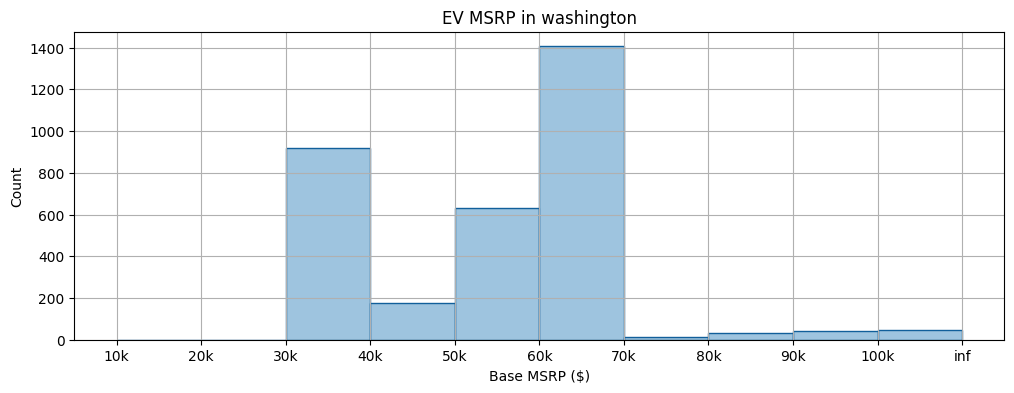

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/ev_cleaned_data.csv')
# df.rename(columns={'VIN (1-10)': 'VIN'}, inplace=True)
# Step 1: Cap MSRP values greater than 100000
df['MSRP_tc'] = df['Base MSRP'].apply(lambda x: 100001 if x > 100000 else x)

# Step 2: Plot histogram (binned by 10k intervals)
plt.figure(figsize=(12, 4))
sns.histplot(df['MSRP_tc'], bins=range(10000, 110001, 10000), kde=False, color="#7eb0d5", edgecolor="#115f9a")

# Step 3: Format the x-axis labels
plt.xticks(ticks=range(10000, 110001, 10000), labels=["10k", "20k", "30k", "40k", "50k",
                                                     "60k", "70k", "80k", "90k", "100k", "inf"])

# Step 4: Add labels and title
plt.xlabel("Base MSRP ($)")
plt.ylabel("Count")
plt.title("EV MSRP in washington")

# Step 5: Show plot
plt.grid(True)
plt.show()

<ipython-input-7-fdffe8466235>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=data,palette='pastel')


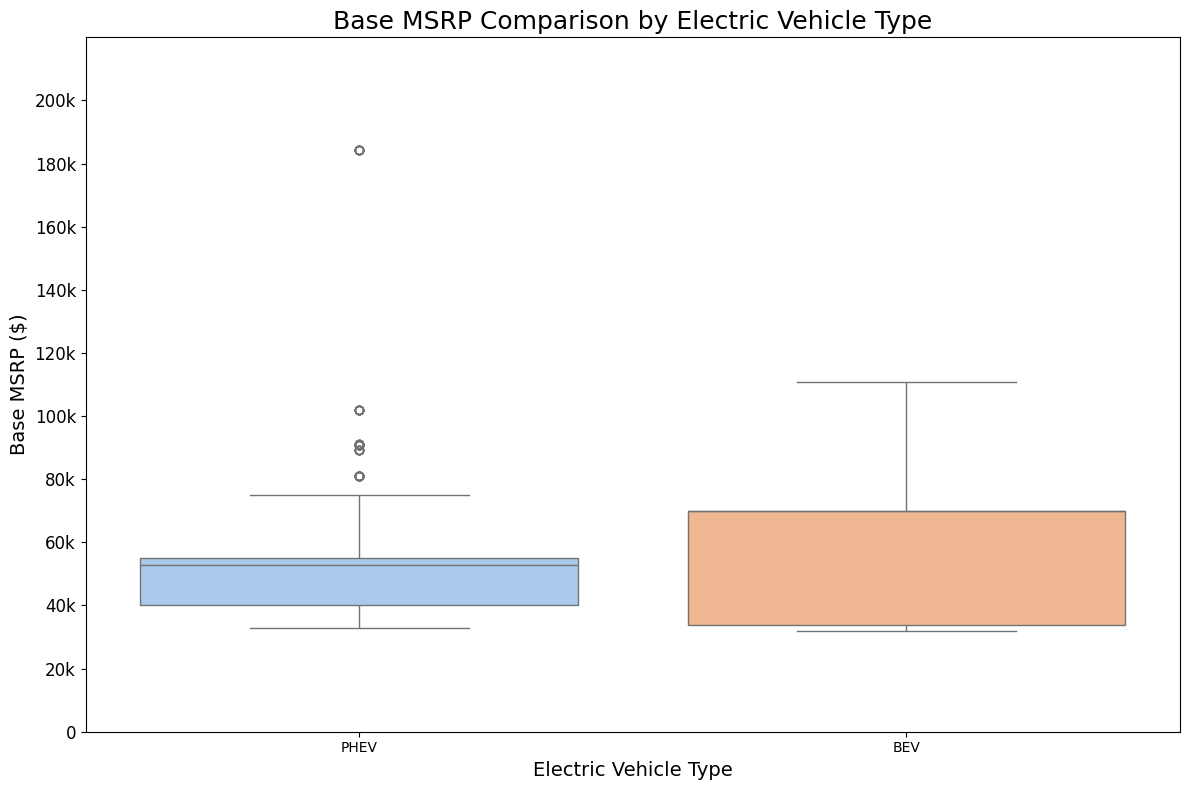

In [ ]:
data = df[df['Base MSRP'] > 0]

# Set the size of the figure for large datasets
plt.figure(figsize=(12,8))

# Create the boxplot
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=data,palette='pastel')

# Title and labels for the plot
plt.title('Base MSRP Comparison by Electric Vehicle Type', fontsize=18)
plt.xlabel('Electric Vehicle Type', fontsize=14)
plt.ylabel('Base MSRP ($)', fontsize=14)
plt.ylim(0, 220000)
# Adjust y-axis labels to display the price range with proper spacing
plt.yticks(
    ticks=range(0, 220000, 20000),  # Increase spacing by adjusting tick range
    labels=['0', '20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k', '180k', '200k'],  # 11 labels
    fontsize=12
)

# To avoid cluttering, limit the number of ticks on the x-axis
plt.xticks(rotation=0)

# Adjust layout for proper spacing
plt.tight_layout()

# Show the plot
plt.show()

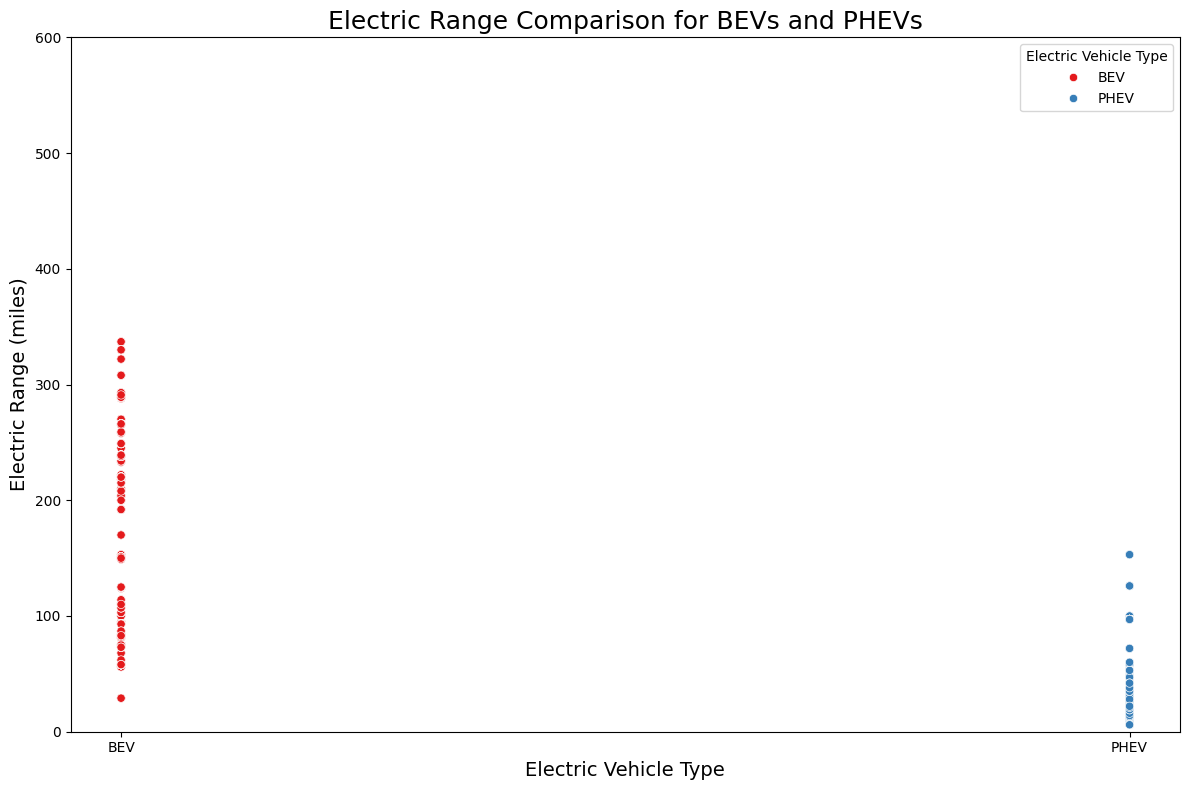

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows where 'Electric Range' is zero or negative
data = df[df['Electric Range'] > 0]

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Create the scatterplot
sns.scatterplot(x='Electric Vehicle Type', y='Electric Range', data=data, hue='Electric Vehicle Type', palette='Set1')

# Title and labels for the plot
plt.title('Electric Range Comparison for BEVs and PHEVs', fontsize=18)
plt.xlabel('Electric Vehicle Type', fontsize=14)
plt.ylabel('Electric Range (miles)', fontsize=14)

# Adjust the y-axis range for better visualization
plt.ylim(0, 600)

# To avoid cluttering, limit the number of ticks on the x-axis
plt.xticks(rotation=0)

# Adjust layout for proper spacing
plt.tight_layout()

# Show the plot
plt.show()


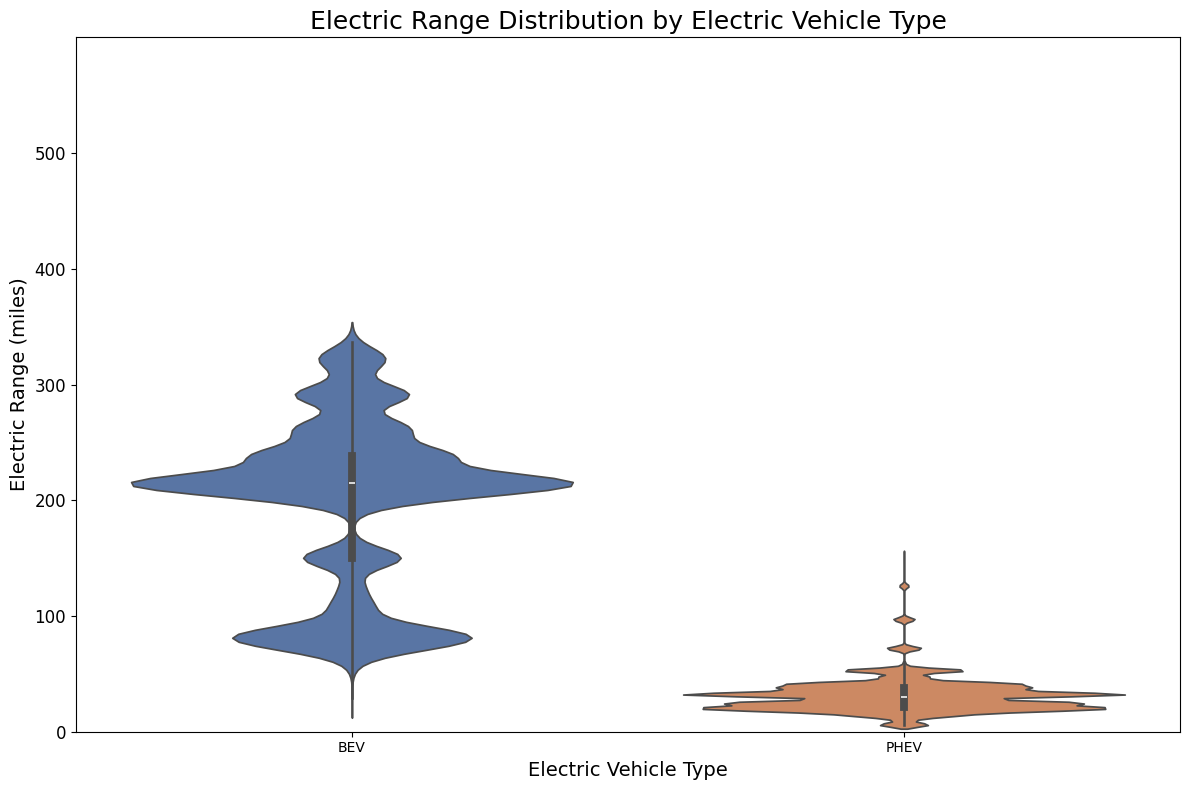

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows where 'Electric Range' is zero or negative
data = df[df['Electric Range'] > 0]

# Set the size of the figure for large datasets
plt.figure(figsize=(12, 8))

# Create the violin plot with 'hue'
sns.violinplot(x='Electric Vehicle Type', y='Electric Range', data=data, hue='Electric Vehicle Type', palette='deep', legend=False)

# Title and labels for the plot
plt.title('Electric Range Distribution by Electric Vehicle Type', fontsize=18)
plt.xlabel('Electric Vehicle Type', fontsize=14)
plt.ylabel('Electric Range (miles)', fontsize=14)

# Adjust the y-axis range to make sure it fits the electric range values
plt.ylim(0, 600)

# Adjust y-axis labels to display the range with proper spacing
plt.yticks(
    ticks=range(0, 600, 100),  # Increase spacing by adjusting tick range
    labels=['0', '100', '200', '300', '400', '500'],
    fontsize=12
)

# To avoid cluttering, limit the number of ticks on the x-axis
plt.xticks(rotation=0)

# Adjust layout for proper spacing
plt.tight_layout()

# Show the plot
plt.show()

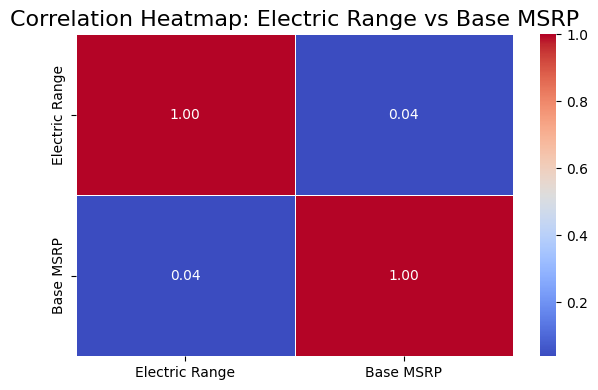

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for valid values
data = df[df['Electric Range'] > 0]  # Ensuring no zero electric range values


# Now, creating a correlation heatmap for 'Electric Range' and 'Base MSRP'
# Calculate the correlation matrix for Base MSRP and Electric Range
correlation = data[['Electric Range', 'Base MSRP']].corr()

# Set up the figure for the heatmap
plt.figure(figsize=(6, 4))

# Creating a heatmap to visualize the correlation between 'Electric Range' and 'Base MSRP'
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Title to the heatmap
plt.title('Correlation Heatmap: Electric Range vs Base MSRP', fontsize=16)
plt.tight_layout()
plt.show()


<ipython-input-13-e4e87805c587>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price Category', y='Electric Range', data=df, palette='deep')


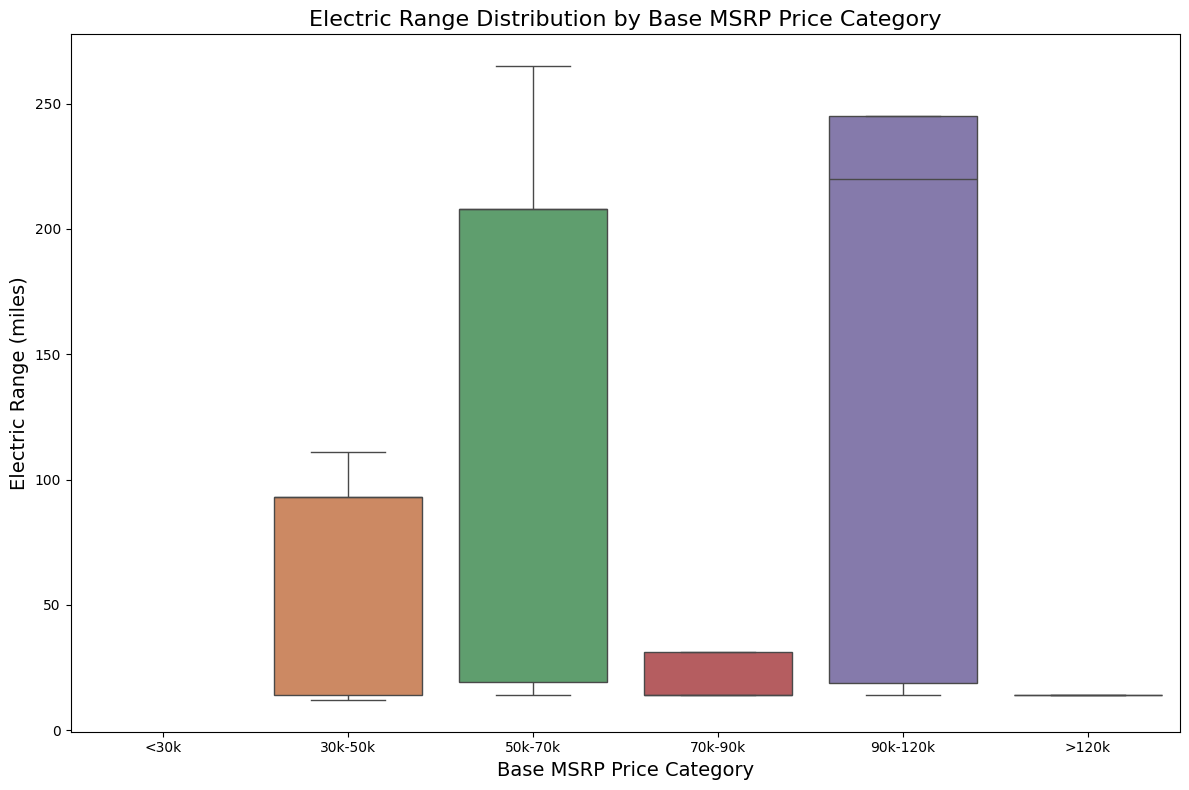

In [ ]:
# Define price categories
bins = [0, 30000, 50000, 70000, 90000, 120000, 200000]
labels = ['<30k', '30k-50k', '50k-70k', '70k-90k', '90k-120k', '>120k']

# Create a new column for the price categories
df['Price Category'] = pd.cut(df['Base MSRP'], bins=bins, labels=labels)

# Set figure size
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='Price Category', y='Electric Range', data=df, palette='deep')

# Title and labels
plt.title('Electric Range Distribution by Base MSRP Price Category', fontsize=16)
plt.xlabel('Base MSRP Price Category', fontsize=14)
plt.ylabel('Electric Range (miles)', fontsize=14)

# Plot
plt.tight_layout()
plt.show()


#QUESTION 5 - How is CAFV eligibility compared for different EV models and counties ?


## **CAFV Analysis**

## CHORoPLETH - CAVF by COUNTY

## CAFV by Make

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np



# Group nd count by make and CAFV Eligibility
grouped = df.groupby(['Make', 'Model', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']).size().reset_index(name='Count')
color_map = {
    'Yes': '#FFD700',      # Gold
    'No': '#CB4154',       # Black
    'Unknown': '#000000'   # Light Brick
}

fig = px.bar(
    grouped,
    x='Make',
    y='Count',
    color='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    color_discrete_map=color_map,

    barmode='stack',
    title='CAFV Eligibility Distribution by EV Make',
    labels={'Count': 'Number of Vehicles'},
    hover_data=['Make', 'Model', 'Count'],
    width=1100,
    height=700
)

fig.update_layout(
    xaxis_tickangle=45,
    legend=dict(font=dict(size=7))

fig.show()


## CAFV Eligibility by COUNTY - Choropleth

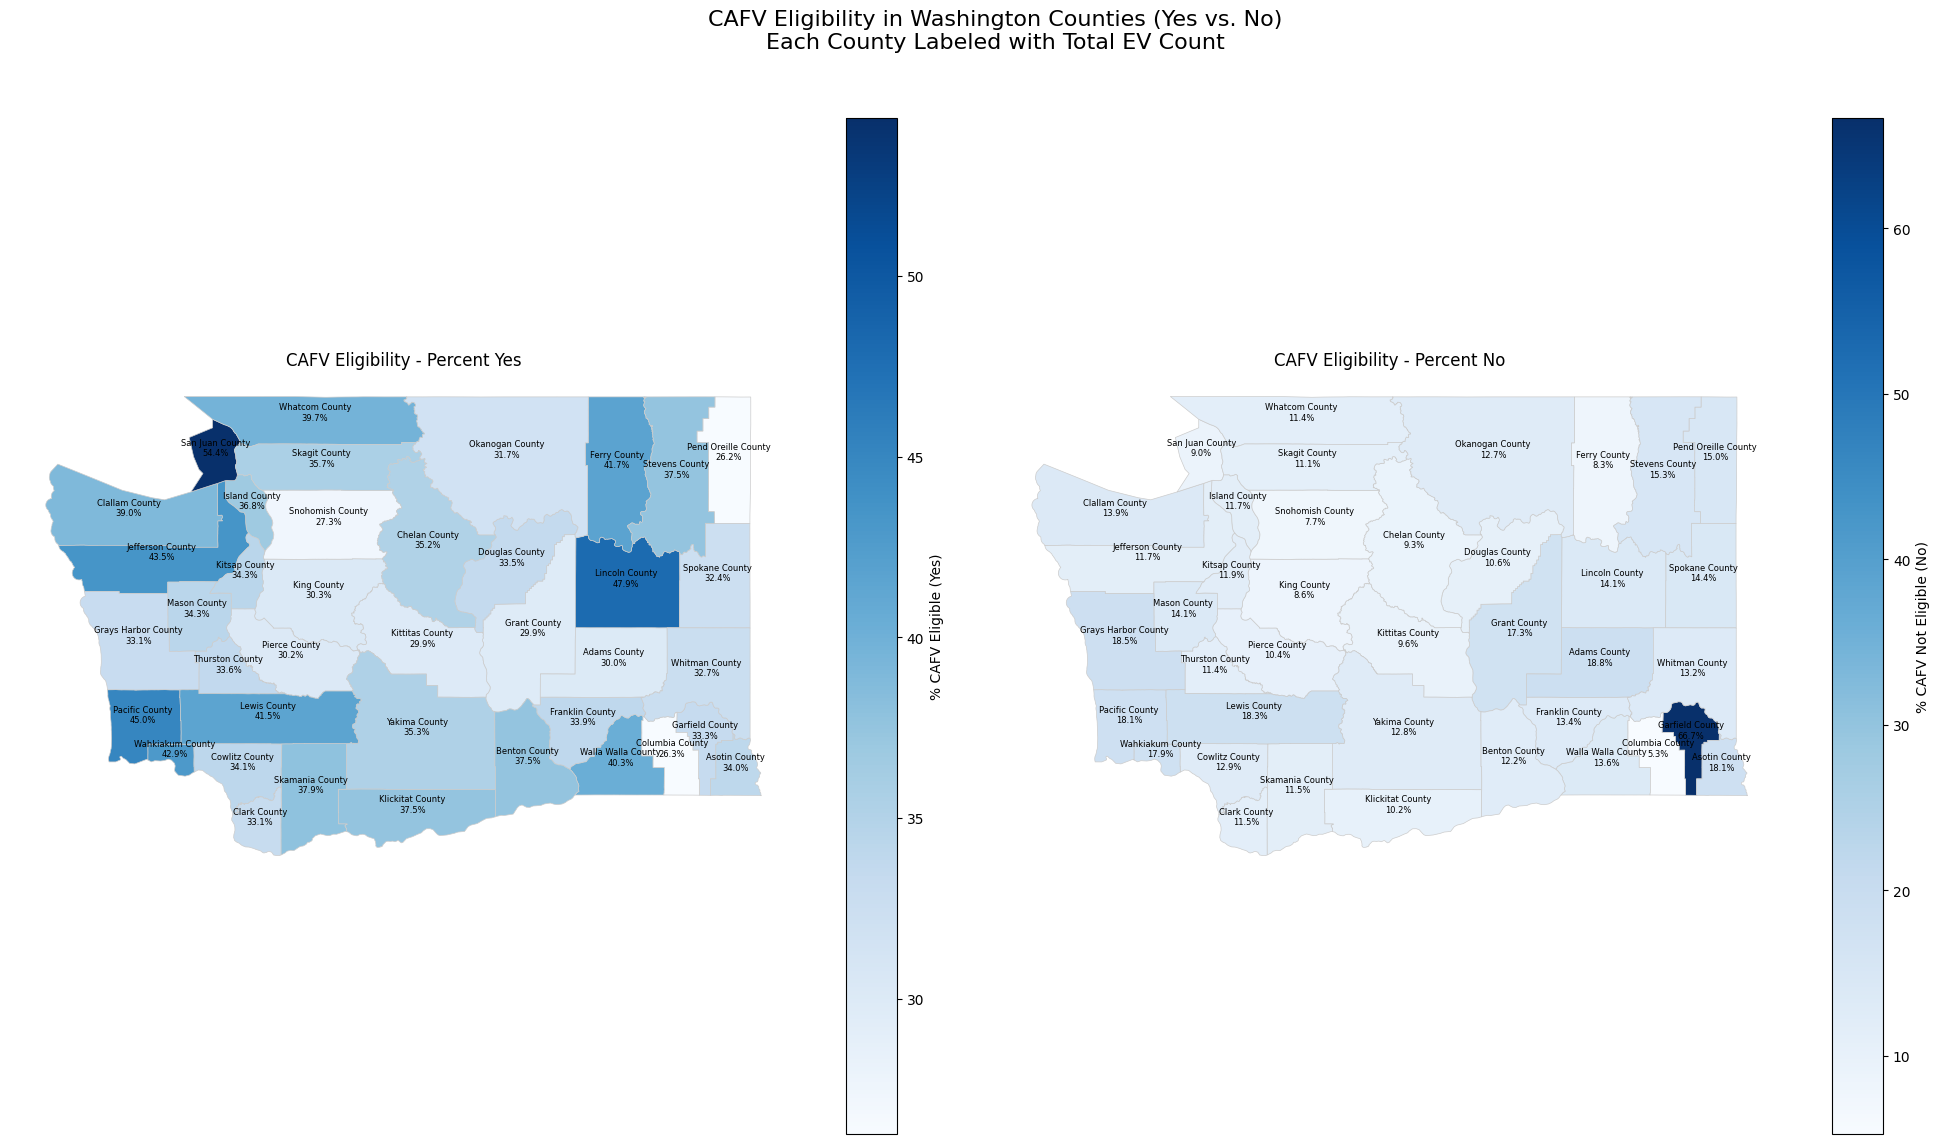

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load  WA counties GeoJSON (county-level)
wa_geo = gpd.read_file("/content/sample_data/WA_County_Boundaries.geojson")
# Step 1: Group and count by County and CAFV Eligibility
eligibility_data = df.groupby(['County', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']).size().unstack(fill_value=0)

# Step 2: Compute total and percentages
# Step 1: Normalize county names
# print(eligibility_counts)

eligibility_data['Total'] = eligibility_data[['Yes', 'No', 'Unknown']].sum(axis=1)
eligibility_data['Percent_Yes'] = (eligibility_data['Yes'] / eligibility_data['Total']) * 100
eligibility_data['Percent_No'] = (eligibility_data['No'] / eligibility_data['Total']) * 100
# print(eligibility_data)


# Normalize and merge
eligibility_data = eligibility_data.reset_index()
eligibility_data['County'] = eligibility_data['County'].str.upper().str.strip() + " COUNTY"
wa_geo['County'] = wa_geo['JURISDICT_NM'].str.upper().str.strip()
wa_geo = wa_geo.merge(eligibility_data, on='County', how='left')

# Plot: Small multiples side-by-side maps
fig, axes = plt.subplots(1, 2, figsize=(20, 12))
cmap='Blues'

# Map 1: Percent Yes
wa_geo.plot(column='Percent_Yes',
            cmap=cmap,
            linewidth=0.5,
            edgecolor='0.8',
            legend=True,
            legend_kwds={'label': "% CAFV Eligible (Yes)"},
            ax=axes[0])
axes[0].set_title("CAFV Eligibility - Percent Yes")
axes[0].axis('off')

# Map 2: Percent No
wa_geo.plot(column='Percent_No',
            cmap=cmap,
            linewidth=0.5,
            edgecolor='0.8',
            legend=True,
            legend_kwds={'label': "% CAFV Not Eligible (No)"},
            ax=axes[1])
axes[1].set_title("CAFV Eligibility - Percent No")
axes[1].axis('off')



# Add EV counts to each county
# Annotate counties on each map
for idx, row in wa_geo.iterrows():
    if row['geometry'].is_empty:
        continue
    centroid = row['geometry'].centroid

    # Left map: % Yes
    if pd.notnull(row['Percent_Yes']):
        label_yes = f"{row['County'].title()}\n{row['Percent_Yes']:.1f}%"
        axes[0].text(centroid.x, centroid.y, label_yes, fontsize=6, ha='center', color='black')

    # Right map: % No
    if pd.notnull(row['Percent_No']):
        label_no = f"{row['County'].title()}\n{row['Percent_No']:.1f}%"
        axes[1].text(centroid.x, centroid.y, label_no, fontsize=6, ha='center', color='black')

plt.suptitle("CAFV Eligibility in Washington Counties (Yes vs. No)\nEach County Labeled with Total EV Count", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()